In [15]:
import pandas as pd
import numpy as np
import os
import threading
import time
import sys
from utils import utils
import copy
from matplotlib import pyplot as plt
import numpy as np
import random
np.random.seed(1234)
random.seed(1234)

routing_algorithm = ["RoundRobin-LCLB", "RoundRobin-MCLB", "RoundRobin-heuristic_TE"]
# cluster_id = ["0", "1"]
cluster_id = [0, 1]

In [53]:
def get_svc_list(f_):
    df = pd.read_csv(f_)
    svc_list = df["service"].unique()
    return svc_list

def calc_resource_usage(files):
    assert len(routing_algorithm) == len(files)
    df_list = list()
    for i in range(len(routing_algorithm)):
        routing = routing_algorithm[i]
        df = pd.read_csv(files[i])
        df["routing"] = [routing]*len(df) # add new column
        print("{}, {}".format(routing, len(df)))
        df_list.append(df)
    df = pd.concat(df_list, axis=0)
    df = df.reset_index(drop=True)
    # display(df)
    # print(len(df))
    
    df_usage = pd.DataFrame(columns=["svc", "cluster_id", "routing", "num_replica", "capacity"])
    svc_list = df["service"].unique()
    for cid in cluster_id:
        for routing in routing_algorithm:
            for svc in svc_list:
                temp_df = df[df["routing"] == routing]
                temp_df = temp_df[temp_df["service"] == svc]
                temp_df = temp_df[temp_df["cluster_id"] == cid]
                temp_df = temp_df.reset_index(drop=True)
                capa = 0
                num_repl = 0
                for i in range(len(temp_df)-1):
                    temp_df.loc[i, "timestamp"]
                    duration = (temp_df.loc[i+1, "timestamp"] - temp_df.loc[i, "timestamp"])
                    num_repl += duration * temp_df.loc[i,"num_replica"]
                    capa += duration * temp_df.loc[i,"capacity"]
                df_usage.loc[len(df_usage)] = [svc, cid, routing, num_repl, capa]
    df_usage = df_usage.sort_values(by=["svc", "cluster_id", "routing"])
    df_usage = df_usage.reset_index(drop=True)
    num_repl_norm_list = list()
    capa_norm_list = list()
    for svc in svc_list:
        for cid in cluster_id:
            temp_df = df_usage[df_usage["cluster_id"]==cid]
            temp_df = temp_df[temp_df["svc"]==svc]
            num = len(temp_df)
            temp_df = temp_df[temp_df["routing"]==routing_algorithm[0]]
            lclb_num_repl = float(temp_df["num_replica"])
            lclb_capa = float(temp_df["capacity"])
            for _ in range(num):
                num_repl_norm_list.append(lclb_num_repl)
                capa_norm_list.append(lclb_capa)
    print(num_repl_norm_list)
    print(capa_norm_list)
    assert len(num_repl_norm_list) == len(df_usage)
    assert len(capa_norm_list) == len(df_usage)
    normalized_num_replica = list()
    normalized_capa= list()
    for i in range(len(df_usage)):
        print("df_usage.loc[i, num_replica]: ", df_usage.loc[i,"num_replica"])
        print("num_repl_norm_list[i]: ", num_repl_norm_list[i])
        temp_num_repl = df_usage.loc[i,"num_replica"]/num_repl_norm_list[i]
        temp_capa = df_usage.loc[i,"capacity"]/capa_norm_list[i]
        normalized_num_replica.append(temp_num_repl)
        normalized_capa.append(temp_capa)
    df_usage["norm_num_replica"] = normalized_num_replica
    df_usage["norm_capacity"] = normalized_capa
    display(df_usage)
    return df_usage
        
capacity_dict = dict()
capacity_dict["cluster0"] = dict()
capacity_dict["cluster1"] = dict()
num_replica_dict = dict()
num_replica_dict["cluster0"] = dict()
num_replica_dict["cluster1"] = dict()

''' Input file '''
# common_path="../simulator/log/sample2-2/three_depth/"
common_path="../simulator/log/hotos-6d9c26b9/three_depth/"

# files = dict()
files = list()
for routing in routing_algorithm:
    print("routing: ", routing)
    f_ = common_path + routing + "/resource_provisioing_log.csv"
    svc_list = get_svc_list(f_)
    # files[routing] = f_
    files.append(f_)
df_usage = calc_resource_usage(files)



routing:  RoundRobin-LCLB
routing:  RoundRobin-MCLB
routing:  RoundRobin-heuristic_TE
RoundRobin-LCLB, 34180
RoundRobin-MCLB, 34130
RoundRobin-heuristic_TE, 34182
[47290000.0, 47290000.0, 47290000.0, 47310000.0, 47310000.0, 47310000.0, 42540000.0, 42540000.0, 42540000.0, 42540000.0, 42540000.0, 42540000.0, 48650000.0, 48650000.0, 48650000.0, 48660000.0, 48660000.0, 48660000.0, 62985000.0, 62985000.0, 62985000.0, 63015000.0, 63015000.0, 63015000.0, 65650000.0, 65650000.0, 65650000.0, 65670000.0, 65670000.0, 65670000.0, 42540000.0, 42540000.0, 42540000.0, 42540000.0, 42540000.0, 42540000.0]
[1576333333.3333335, 1576333333.3333335, 1576333333.3333335, 1577000000.0, 1577000000.0, 1577000000.0, 4254000000.0, 4254000000.0, 4254000000.0, 4254000000.0, 4254000000.0, 4254000000.0, 1946000000.0, 1946000000.0, 1946000000.0, 1946400000.0, 1946400000.0, 1946400000.0, 1574625000.0, 1574625000.0, 1574625000.0, 1575375000.0, 1575375000.0, 1575375000.0, 2188333333.3333335, 2188333333.3333335, 218833333

,svc,cluster_id,routing,num_replica,capacity,norm_num_replica,norm_capacity
0,A,0,RoundRobin-LCLB,47290000,1.576333e+09,1.000000,1.000000
1,A,0,RoundRobin-MCLB,43750000,1.458333e+09,0.925143,0.925143
2,A,0,RoundRobin-heuristic_TE,46225000,1.540833e+09,0.977479,0.977479
3,A,1,RoundRobin-LCLB,47310000,1.577000e+09,1.000000,1.000000
4,A,1,RoundRobin-MCLB,43780000,1.459333e+09,0.925386,0.925386
5,A,1,RoundRobin-heuristic_TE,46245000,1.541500e+09,0.977489,0.977489
6,B,0,RoundRobin-LCLB,42540000,4.254000e+09,1.000000,1.000000
7,B,0,RoundRobin-MCLB,42540000,4.254000e+09,1.000000,1.000000
8,B,0,RoundRobin-heuristic_TE,42540000,4.254000e+09,1.000000,1.000000
9,B,1,RoundRobin-LCLB,42540000,4.254000e+09,1.000000,1.000000


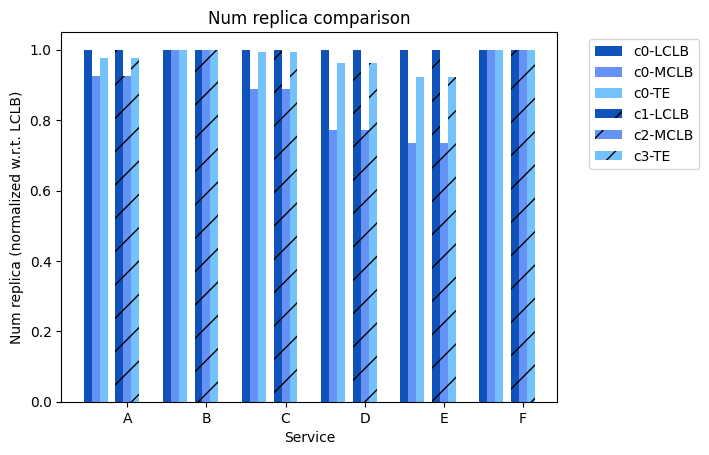

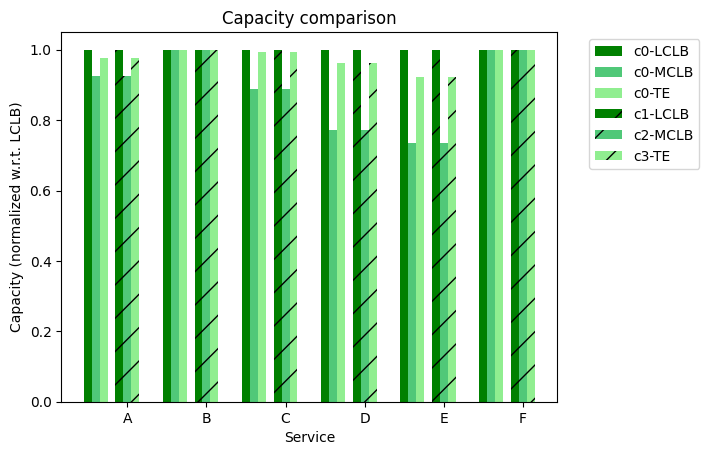

In [72]:
# Sample data for the bar plots

cl = ['#0F52BA', '#6593F5', '#73C2FB']
bar_width = 0.1
x = np.arange(6)
plt.bar(x - 5*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[0])]["norm_num_replica"], width=bar_width, color=cl[0], label='c0-LCLB')
plt.bar(x - 4*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[1])]["norm_num_replica"], width=bar_width, color=cl[1], label='c0-MCLB')
plt.bar(x - 3*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[2])]["norm_num_replica"], width=bar_width, color=cl[2], label='c0-TE')
plt.bar(x - 1*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[0])]["norm_num_replica"], width=bar_width, color=cl[0], hatch="/", label='c1-LCLB')
plt.bar(x - 0*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[1])]["norm_num_replica"], width=bar_width, color=cl[1], hatch="/", label='c2-MCLB')
plt.bar(x + 1*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[2])]["norm_num_replica"], width=bar_width, color=cl[2], hatch="/", label='c3-TE')
plt.xticks(x, svc_list)
plt.xlabel('Service')
plt.ylabel('Num replica (normalized w.r.t. LCLB)')
plt.title('Num replica comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


cl = ['#008000', '#50C878', '#90EE90']
plt.bar(x - 5*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[0])]["norm_capacity"], width=bar_width, color=cl[0], label='c0-LCLB')
plt.bar(x - 4*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[1])]["norm_capacity"], width=bar_width, color=cl[1], label='c0-MCLB')
plt.bar(x - 3*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[2])]["norm_capacity"], width=bar_width, color=cl[2], label='c0-TE')
plt.bar(x - 1*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[0])]["norm_capacity"], width=bar_width, color=cl[0], hatch="/", label='c1-LCLB')
plt.bar(x - 0*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[1])]["norm_capacity"], width=bar_width, color=cl[1], hatch="/", label='c2-MCLB')
plt.bar(x + 1*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[2])]["norm_capacity"], width=bar_width, color=cl[2], hatch="/", label='c3-TE')
plt.xticks(x, svc_list)
plt.xlabel('Service')
plt.ylabel('Capacity (normalized w.r.t. LCLB)')
plt.title('Capacity comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
def plot_and_save_resource_provisioning(self):
    def get_ylim(req_arr_0, req_arr_1, capa_0, capa_1):
        def get_max_rps_ylim(reqarr):
            cur = 1000 # 1000ms, 1sec
            cnt_list = list()
            cnt_list.append(0)
            idx = 0
            for arr in reqarr:
                if arr > cur: # Every 1000ms
                    cur += 1000
                    idx += 1
                    cnt_list.append(0)
                cnt_list[idx] += 1
            max_rps = max(cnt_list) # Max number of request/sec which will be the max y value in the plot
            return max_rps
        max_rps_cluster_0 = get_max_rps_ylim(req_arr_0)
        max_rps_cluster_1 = get_max_rps_ylim(req_arr_1)
        max_rps = max(max_rps_cluster_0, max_rps_cluster_1)\
            
        cluster_0_capa_trend = dict()
        cluster_1_capa_trend = dict()
        for service in capa_0:
            cluster_0_capa_trend[service] = [ x[1] for x in capa_0[service]]
            print("cluster_0_capa_trend,{}".format(service.name))
            print(cluster_0_capa_trend[service])
        for service in capa_1:
            cluster_1_capa_trend[service] = [ x[1] for x in capa_1[service]]
            print("cluster_1_capa_trend[service]: ", cluster_1_capa_trend[service])
        max_capa_cluster_0 = 0
        for service in cluster_0_capa_trend:
            if len(cluster_0_capa_trend[service]) > 0:
                max_capa_cluster_0 = max(max_capa_cluster_0, max(cluster_0_capa_trend[service]))
        max_capa_cluster_1 = 0
        for service in cluster_1_capa_trend:
            if len(cluster_1_capa_trend[service]) > 0:
                max_capa_cluster_1 = max(max_capa_cluster_1, max(cluster_1_capa_trend[service]))
        max_capa = max(max_capa_cluster_0, max_capa_cluster_1)
        ymax = max(max_rps, max_capa) + 10
        return ymax
        
    ylim = get_ylim(self.request_arr_0, self.request_arr_1, self.cluster0_capacity, self.cluster1_capacity)
    title_cluster_0 = "cluster_0-" + self.get_experiment_title()
    title_cluster_1 = "cluster_1-" + self.get_experiment_title()
    path_to_autoscaler_cluster_0 = self.get_output_dir()+"/resource_provisioing_trend-cluster_0.pdf"
    path_to_autoscaler_cluster_1 = self.get_output_dir()+"/resource_provisioing_trend-cluster_1.pdf"
    utils.plot_workload_histogram_with_autoscaling(self.request_arr_0, self.cluster0_capacity, title_cluster_0, ylim, path_to_autoscaler_cluster_0)
    utils.plot_workload_histogram_with_autoscaling(self.request_arr_1, self.cluster1_capacity, title_cluster_1, ylim, path_to_autoscaler_cluster_1)
    
common_path="../simulator/log/hotos-6d9c26b9/three_depth/"
for routing in routing_algorithm:
    plot_and_save_resource_provisioning(common_path + routing + "/")